In [38]:
import cv2
import numpy as np

# Load the two images
image1 = cv2.imread('download.jpg')
#size of image
image2 = cv2.imread('final1.jpg')
# Resize the images

image1 = cv2.resize(image1, (400, 400))
image2 = cv2.resize(image2, (400, 400))


# Perform addition
addition = cv2.add(image1, image2)

# Perform subtraction
subtraction = cv2.subtract(image1, image2)

# Perform division
division = cv2.divide(image1, image2)

# Perform bitwise AND
bitwise_and = cv2.bitwise_and(image1, image2)

# Perform bitwise OR
bitwise_or = cv2.bitwise_or(image1, image2)

# Perform bitwise NOT
bitwise_not = cv2.bitwise_not(image1)

# Perform bitwise XOR
bitwise_xor = cv2.bitwise_xor(image1, image2)

# Perform complement
complement = cv2.bitwise_not(image1)

# Display the results
cv2.imshow('Addition', addition)
cv2.imshow('Subtraction', subtraction)
cv2.imshow('Division', division)
cv2.imshow('Bitwise AND', bitwise_and)
cv2.imshow('Bitwise OR', bitwise_or)
cv2.imshow('Bitwise NOT', bitwise_not)
cv2.imshow('Bitwise XOR', bitwise_xor)
cv2.imshow('Complement', complement)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


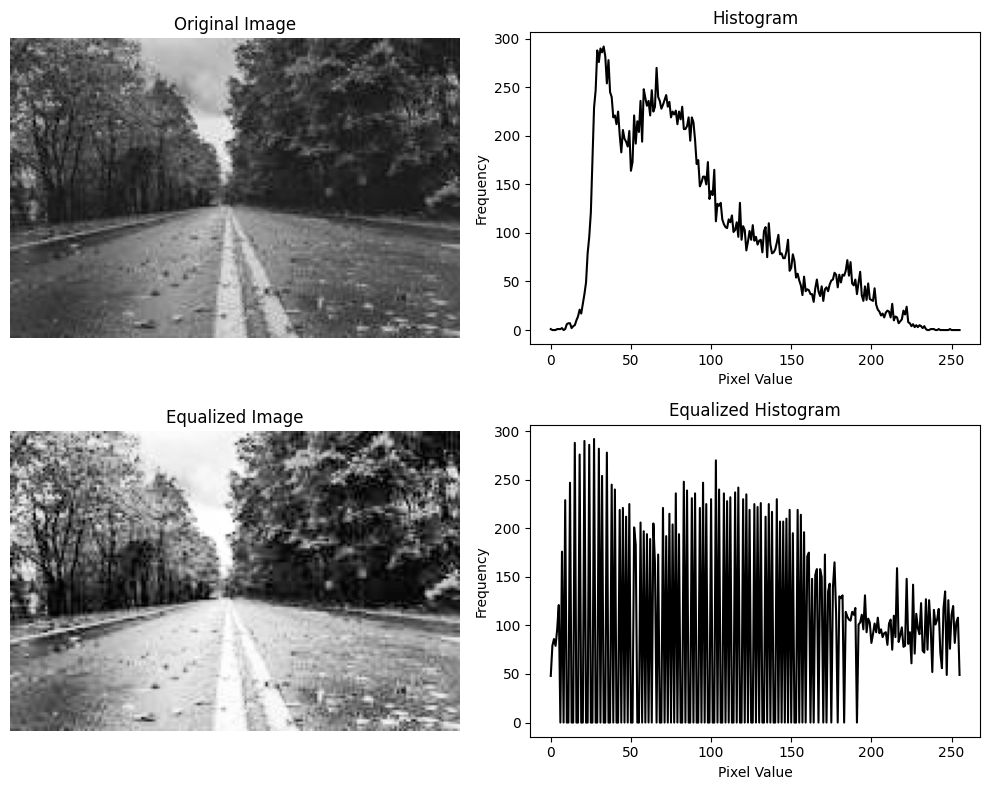

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('download.jpg', 0)

# Calculate the histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Perform histogram equalization
equalized_image = cv2.equalizeHist(image)

# Calculate the equalized histogram
equalized_hist = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Display the original and equalized images
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')
axs[0, 1].plot(hist, color='black')
axs[0, 1].set_title('Histogram')
axs[0, 1].set_xlabel('Pixel Value')
axs[0, 1].set_ylabel('Frequency')
axs[1, 0].imshow(equalized_image, cmap='gray')
axs[1, 0].set_title('Equalized Image')
axs[1, 0].axis('off')
axs[1, 1].plot(equalized_hist, color='black')
axs[1, 1].set_title('Equalized Histogram')
axs[1, 1].set_xlabel('Pixel Value')
axs[1, 1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

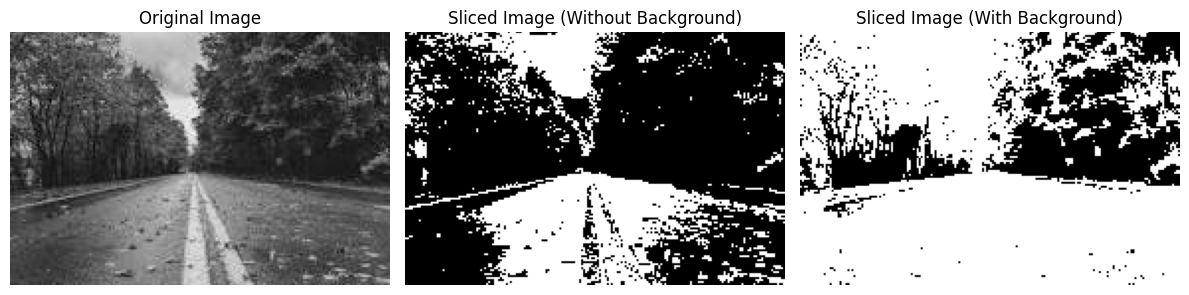

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('download.jpg', 0)

# Apply gray level slicing without background
lower_threshold = 100
upper_threshold = 200
sliced_image_without_bg = cv2.inRange(image, lower_threshold, upper_threshold)

# Apply gray level slicing with background
background_threshold = 50
sliced_image_with_bg = cv2.inRange(image, lower_threshold, upper_threshold)
sliced_image_with_bg = cv2.bitwise_or(sliced_image_with_bg, cv2.bitwise_not(cv2.inRange(image, 0, background_threshold)))

# Display the original and sliced images
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(sliced_image_without_bg, cmap='gray')
axs[1].set_title('Sliced Image (Without Background)')
axs[1].axis('off')
axs[2].imshow(sliced_image_with_bg, cmap='gray')
axs[2].set_title('Sliced Image (With Background)')
axs[2].axis('off')
plt.tight_layout()
plt.show()

In [15]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('download.jpg')

# Define the 3x3 kernel
kernel_3x3 = np.ones((3, 3), np.float32) / 9

# Apply the 3x3 kernel operation
filtered_image_3x3 = cv2.filter2D(image, -1, kernel_3x3)

# Define the 5x5 kernel
kernel_5x5 = np.ones((5, 5), np.float32) / 25

# Apply the 5x5 kernel operation
filtered_image_5x5 = cv2.filter2D(image, -1, kernel_5x5)

# Display the original and filtered images
cv2.imshow('Original Image', image)
cv2.imshow('Filtered Image (3x3)', filtered_image_3x3)
cv2.imshow('Filtered Image (5x5)', filtered_image_5x5)
cv2.waitKey(0)
cv2.destroyAllWindows()

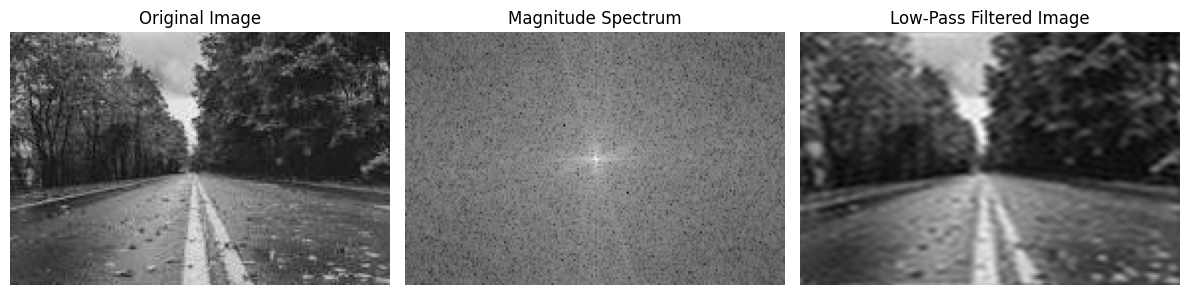

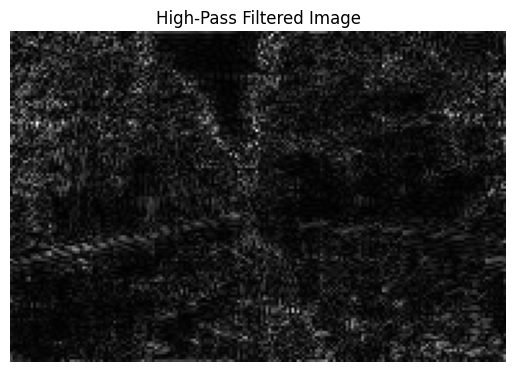

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('download.jpg', 0)

# Perform the DFT
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Calculate the magnitude spectrum
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# Create a mask for low-pass filtering
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow - 30:crow + 30, ccol - 30:ccol + 30] = 1

# Apply the mask to the frequency domain representation
dft_shift_filtered = dft_shift * mask

# Perform the inverse DFT
idft_shift = np.fft.ifftshift(dft_shift_filtered)
filtered_image = cv2.idft(idft_shift)
filtered_image = cv2.magnitude(filtered_image[:, :, 0], filtered_image[:, :, 1])

# Create a mask for high-pass filtering
mask_highpass = np.ones((rows, cols, 2), np.uint8)
mask_highpass[crow - 30:crow + 30, ccol - 30:ccol + 30] = 0

# Apply the mask to the frequency domain representation
dft_shift_filtered_highpass = dft_shift * mask_highpass

# Perform the inverse DFT for high-pass filtering
idft_shift_highpass = np.fft.ifftshift(dft_shift_filtered_highpass)
filtered_image_highpass = cv2.idft(idft_shift_highpass)
filtered_image_highpass = cv2.magnitude(filtered_image_highpass[:, :, 0], filtered_image_highpass[:, :, 1])

# Display the original image and filtered images
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(magnitude_spectrum, cmap='gray')
axs[1].set_title('Magnitude Spectrum')
axs[1].axis('off')
axs[2].imshow(filtered_image, cmap='gray')
axs[2].set_title('Low-Pass Filtered Image')
axs[2].axis('off')
plt.tight_layout()
plt.show()

# Display the high-pass filtered image
plt.imshow(filtered_image_highpass, cmap='gray')
plt.title('High-Pass Filtered Image')
plt.axis('off')
plt.show()